**Francis O'Hara**

CS 251: Data Analysis and Visualization

# Lab 6b | Naive Bayes and K-Nearest Neighbor Classifiers

In this lab we will be using the library scikit-learn to train a Multinomial Naive Bayes classifier and graph the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
from sklearn import neighbors, naive_bayes, metrics
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Load the digits dataset

We're going to be seeing if we can use Naive Bayes and K-Nearest Neighbor to classify hand writing data.  The [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) is a set of 1797 8x8 pixel images, representing handwriting samples of the numbers 0-9. On your next project, you will work with another (much larger) handwriting dataset called [MNIST](http://yann.lecun.com/exdb/mnist/).

1. Load the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Use the `return_X_y` parameter so that it returns both the X data and y classifications.
2. Use [train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the X data and y classifications, into an X_training dataset, X_testing dataset and the corresponding y_training labels and y_testing labels.  Set the test size be `0.3` (i.e 30%) and shuffle to True.
3. Print the shape of `X_training`, `X_testing`, `y_training`, and `y_testing`.

In [4]:
np.random.seed(42)

X, y = datasets.load_digits(return_X_y=True)
X_training, X_testing, y_training, y_testing = model_selection.train_test_split(X, y, test_size=0.3)

print(f"{X_training.shape=}")
print(f"{X_testing.shape=}")
print(f"{y_training.shape=}")
print(f"{y_testing.shape=}")



print('''
X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)
''')

X_training.shape=(1257, 64)
X_testing.shape=(540, 64)
y_training.shape=(1257,)
y_testing.shape=(540,)

X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)



## Task 2: Create Classifiers and Calculate Accuracy

### Create a Naive Bayes Classifier
1. Create a [Multinomial Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) [(More Info)](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). 
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the Naive Bayes classifier.

### Create a K-NN Classifier
1. Using the lab from last week as reference, create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set n_neighbors equal to 7.
1. Assign your classifier to a variable with a **different** name than your Naive Bayes classifier.  
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the K-NN classifier.


In [22]:
nb_classifier = naive_bayes.MultinomialNB()
nb_classifier.fit(X_training, y_training)
nb_accuracy = nb_classifier.score(X_testing, y_testing)
print(f"Multinomial Naive Bayes Classifer Accuracy: {nb_accuracy}")

knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_training, y_training)
knn_accuracy = knn_classifier.score(X_testing, y_testing)
print(f"K-Nearest Neighbors Classifier Accuracy: {knn_accuracy}")

print('''
Multinomial Naive Bayes Classifier Accuracy: 0.89444...
K-Nearest Neighbor Classifier Accuracy:   0.99074...
''')

Multinomial Naive Bayes Classifer Accuracy: 0.8944444444444445
K-Nearest Neighbors Classifier Accuracy: 0.9907407407407407

Multinomial Naive Bayes Classifier Accuracy: 0.89444...
K-Nearest Neighbor Classifier Accuracy:   0.99074...



## Task 3: Create a confusion matrix for each classifier

1. Find the predicted labels for the X test data using the predict method for the Naive Bayes classifier and K-NN classifier.
1. Create a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for each classifier, using the actual labels and predicted labels.  
2. Print the confusion matrices. If everything is working as expected, you should see vast majority of numbers along the main diagonal (*going from the top-left to the bottom-right of the matrix*).
3. Visualize the confusion matrices using imshow. For reference, use Lab 4a and this [matplotlib example](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) of an annotated heatmap.
    1. Set x_ticks and y_ticks to align with the list of digits.
    2. Use imshow to draw the matrix
    3. Choose a perceptually uniform, sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html)
    4. Use a colorbar to label the matrix
    5. Remember to call `plt.show()` at the end, or other plots later might not work.
    6. Give your plots meaningful titles.

K-Nearest Neighbor Confusion Matrix:
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 33  7  0  0  0  0  0  6  4]
 [ 0  1 44  0  0  0  0  0  2  0]
 [ 0  0  1 46  0  0  0  1  4  2]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 51  1  0  0 13]
 [ 0  0  0  0  1  0 51  0  1  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  1  1  0  4  3 50]]
 Multinomial Naive Bayes Confusion Matrix: 
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]

K-Nearest Neighbor Confusion Matrix
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0

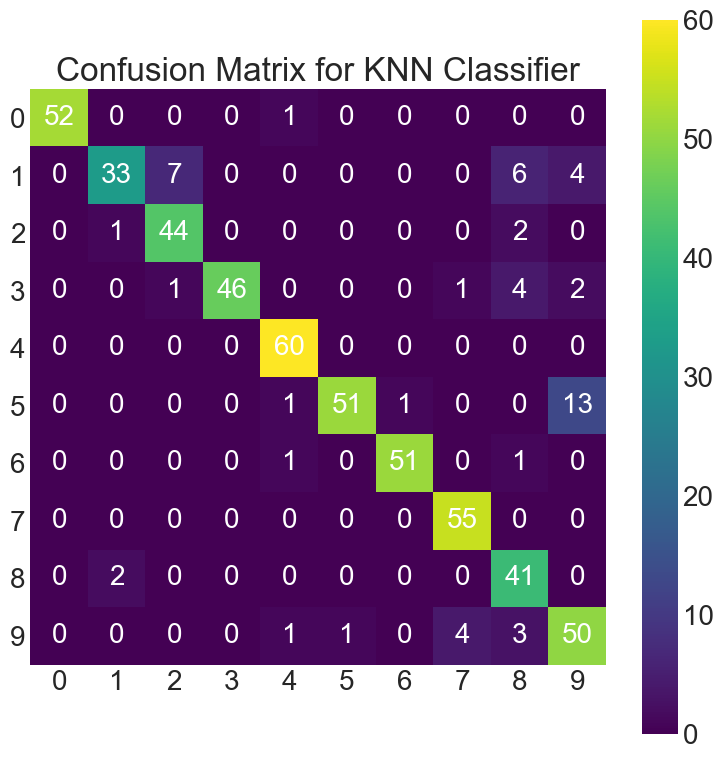

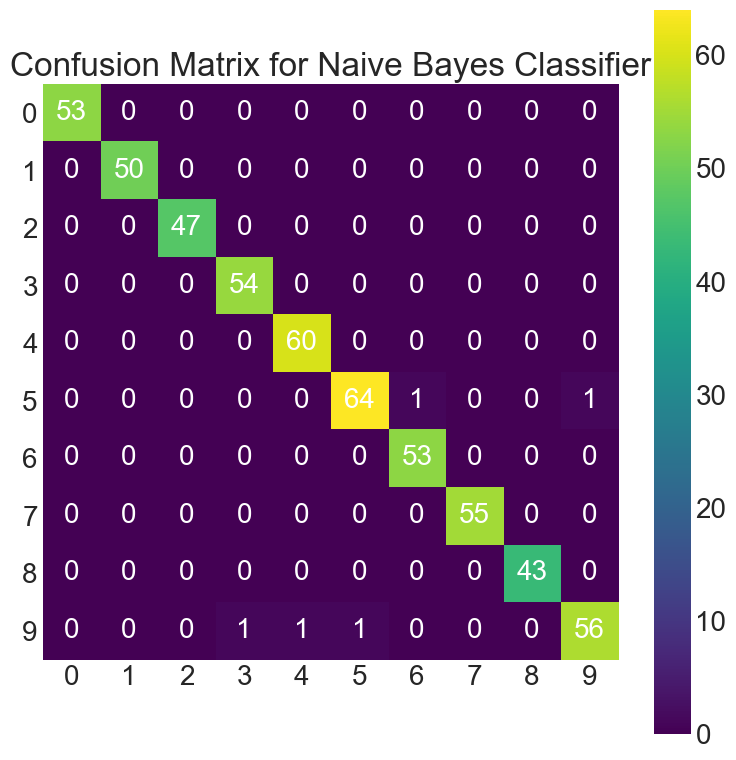

In [21]:
y_pred_knn = knn_classifier.predict(X_testing)
y_pred_nb = nb_classifier.predict(X_testing)

knn_matrix = metrics.confusion_matrix(y_testing, y_pred_nb)
naive_bayes_matrix = metrics.confusion_matrix(y_testing, y_pred_knn)

print("K-Nearest Neighbor Confusion Matrix:\n", knn_matrix)
print(" Multinomial Naive Bayes Confusion Matrix: \n", naive_bayes_matrix)


print('''
K-Nearest Neighbor Confusion Matrix
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]
 Multinomial Naive Bayes Confusion Matrix
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 33  7  0  0  0  0  0  6  4]
 [ 0  1 44  0  0  0  0  0  2  0]
 [ 0  0  1 46  0  0  0  1  4  2]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 51  1  0  0 13]
 [ 0  0  0  0  1  0 51  0  1  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  1  1  0  4  3 50]]
''')

# plot knn confusion matrix
labels = [f"{i}" for i in range(len(knn_matrix))]
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(knn_matrix, cmap="viridis")
plt.colorbar(im)

ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, knn_matrix[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion Matrix for KNN Classifier")
fig.tight_layout()
ax.grid(False)
plt.show()


# plot naive bayes confusion matrix
labels = [f"{i}" for i in range(len(naive_bayes_matrix))]
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(naive_bayes_matrix, cmap="viridis")
plt.colorbar(im)

ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, naive_bayes_matrix[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion Matrix for Naive Bayes Classifier")
fig.tight_layout()
ax.grid(False)
plt.show()


### Question 1: Which digits are most likely to be misclassified and what are they most likely to be misclassified as?

For the KNN classifier, the digits most likely to be misclassified are $5$, $1$, and $3$.  
$5$ is usually misclassified as $9$, $1$ is usually misclassified as $2$, $8$, or $9$, and $3$ is usually misclassified as $8$ or $9$.

For the Naive Bayes classifier, the digits most likely to be misclassified are $5$ and $9$, with $5$ usually being misclassified as $6$ or $9$ and with $9$ usually being misclassified as $3$, $4$, or $5$.

The KNN classifier seems to be more prone to misclassifying digits than the Naive Bayes classifier.